## Data - Classification - Incremental - Mixed (Gama 2005)

In [1]:
import numpy as np
import pandas as pd

In [2]:
v = np.random.choice([False,True], size=20000)
w = np.random.choice([False,True], size=20000)

x = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.7,0.1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1], size=20000)
z = np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=[0.7,0.1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1], size=20000)


### Concept Drifts

One incremntal drift:

Start @ [5000]: changes x and z. list of probabilities is shifted by 1. Do 10 shifts.


In [3]:
#Drifts
j=0
p=[0.7,0.1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.1]
for i in range(10):
    element = p.pop()
    p.insert(0, element)
    x[5000+j:6000+j]=np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=p, size=1000)
    z[5000+j:6000+j]=np.random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], p=p, size=1000)

    j += 1000

In [4]:
condition1 = v & w
condition2 = v | w
condition3 = z < 0.5 + 0.3 * np.sin(3*np.pi*x)

y = np.where(condition1 | (condition2 & condition3),np.ones(20000, dtype=np.int8), np.zeros(20000, dtype=np.int8))

In [5]:
data = pd.DataFrame([v,w,x,z,y]).transpose()
data.columns = ['x1','x2','x3','x4', 'y']
data['y'] = data['y'].astype('int32')

In [6]:
data

,x1,x2,x3,x4,y
0,False,True,0,0.1,1
1,False,False,0,0.1,0
2,False,False,0,1,0
3,True,False,0,0,1
4,True,True,0.1,0,1
...,...,...,...,...,...
19995,False,False,0,0,0
19996,False,False,0,0,0
19997,True,True,0,0.7,1
19998,False,False,0,0,0


In [7]:
data.to_csv('mixed_with_1_incremental_drift.csv', index=False)

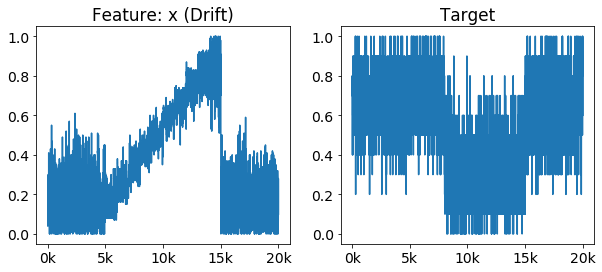

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(10,4))


ax[0].plot(data['x3'].rolling(10).mean())
ax[0].set_title('Feature: x (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



ax[1].plot(data['y'].rolling(10).mean())
ax[1].set_title('Target')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('mixed_incremental.png', bbox_inches='tight', dpi=300)